**Importing libraries and dataset**

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout,BatchNormalization
import PIL
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import os
from PIL import Image
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filenames= os.listdir("/content/drive/MyDrive/MRL closed")
print(filenames)

['s0019_02170_0_0_0_0_1_01.png', 's0019_02163_0_0_0_0_0_01.png', 's0019_02140_0_0_0_0_0_01.png', 's0019_02152_0_0_0_0_0_01.png', 's0019_02160_0_0_0_0_0_01.png', 's0019_02168_0_0_0_0_1_01.png', 's0019_02141_0_0_0_0_0_01.png', 's0019_02145_0_0_0_0_0_01.png', 's0019_02148_0_0_0_0_0_01.png', 's0019_02147_0_0_0_0_0_01.png', 's0019_02139_0_0_0_0_1_01.png', 's0019_02134_0_0_0_0_0_01.png', 's0019_02161_0_0_0_0_1_01.png', 's0019_02166_0_0_0_0_1_01.png', 's0019_02150_0_0_0_0_0_01.png', 's0019_02164_0_0_0_0_1_01.png', 's0019_02146_0_0_0_0_0_01.png', 's0019_02153_0_0_0_0_0_01.png', 's0019_02165_0_0_0_0_0_01.png', 's0019_02172_0_0_0_0_1_01.png', 's0019_02151_0_0_0_0_0_01.png', 's0019_02142_0_0_0_0_0_01.png', 's0019_02171_0_0_0_0_0_01.png', 's0019_02158_0_0_0_0_0_01.png', 's0019_02203_0_0_0_0_0_01.png', 's0019_02205_0_0_0_0_0_01.png', 's0019_02202_0_0_0_0_0_01.png', 's0019_02209_0_0_0_0_1_01.png', 's0019_02187_0_0_0_0_0_01.png', 's0019_02210_0_0_0_0_0_01.png', 's0019_02190_0_0_0_0_1_01.png', 's0019_

**Creating a directory for resized images**

In [ ]:
os.mkdir('/content/image resized 2 ')

**Resizing and converting into grayscale**

In [ ]:
original_folder ='/content/drive/MyDrive/MRL closed'
resized_folder='/content/image resized 2 '

for i in range(1600):

  filename1 = os.listdir(original_folder)[i]
  img_path = original_folder+'/'+filename1
  img = Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert("L")
  newimgpath=resized_folder+'/closed'+filename1
  img.save(newimgpath)

In [ ]:
img_path = original_folder+'/'+filename1

In [ ]:
original_folder ='/content/drive/MyDrive/MRL open'
resized_folder='/content/image resized 2 '
j=0
for j in range(1600):
  filename1 = os.listdir(original_folder)[j]
  img_path = original_folder+'/'+filename1
  img = Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert("L")
  newimgpath=resized_folder+'/open'+filename1
  img.save(newimgpath)

In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/image resized 2 '))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  3200


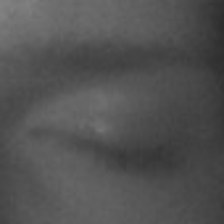

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image=cv2.imread("/content/image resized /closeds0019_01492_0_0_0_0_0_01.png")
cv2_imshow(image)

In [ ]:
a = plt.imread("/content/image resized /closeds0019_01644_0_0_0_0_0_01.png")
a.shape

(224, 224)

In [ ]:
import cv2
import glob
image_directory = '/content/image resized 2'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

open_close = np.asarray([cv2.imread(file) for file in files])
print(open_close)

[]


In [ ]:
filenames=os.listdir("/content/image resized 2 ")
labels_1=[]
for i in range(3200):
  file_name=filenames[i]
  label=file_name[0:5]
  if label=="close":
    labels_1.append(1)
  else:
    labels_1.append(0)

print(labels_1)
print(len(labels_1))


[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 

In [ ]:
print(os.listdir("/content/image resized 2 ")[3])

opens0028_00291_0_1_1_0_0_01.png


**Splitting training and testing data**

In [ ]:
x=open_close
y=np.asarray(labels_1)
#print(x)
#print(y)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [ ]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(2960, 224, 224, 3) (740, 224, 224, 3)
(2960,) (740,)


**Normalizing the data**

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
print(x_train)
print(x_test)

In [2]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu', input_shape= (224,224,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(x_train,y_train,epochs=5)

In [ ]:
model.evaluate(x_test,y_test)

24/24 [==============================] - 1s 29ms/step - loss: 0.0878 - accuracy: 0.9595


[0.08775061368942261, 0.9594594836235046]

In [ ]:
c=cv2.resize(cv2.imread('/content/th (1).jpeg'),(224,224))
sc=c/255
a=np.reshape(sc,[1,224,224,3])
pred=model.predict(a)
#plt.imread('/content/th.jpeg')
if pred>0.5:
  y='closed'
else:
  y='open'
print(y)

In [ ]:
model.save("/content/drive/MyDrive/drowsiness_classifier.keras")